In [313]:
import numpy as np
from scipy import signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import math
from IPython.display import Audio

In [314]:
np.random.seed(0)
n_samples=500
time = np.linspace(0,8,n_samples)

sample1_data = np.sin(5*time) # Signal 1 : sinusoidal signal
sample2_data = signal.sawtooth(1.0 * np.pi * time) # Signal 2 : saw tooth signal

In [315]:
def sigmoid(y):
    g=np.divide(1,np.add(1,np.exp(-y)))
    return g

def gradient(eta, Y, W):
    delW=np.zeros(W.shape)
    Z=sigmoid(Y)
    Id=np.identity(Y.shape[0])
    grad=eta*(Id+np.dot((1-2*Z),Y.T))*W
    return grad

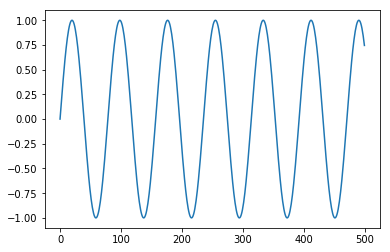

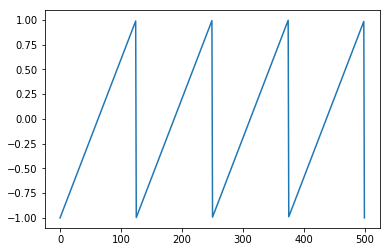

In [316]:
plt.figure(1)
plt.plot(sample1_data)
plt.show()
plt.figure(2)
plt.plot(sample2_data)
plt.show()

Mixing matrix: 
[[ 0.5488135   0.71518937]
 [ 0.60276338  0.54488318]]


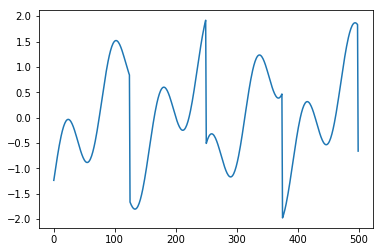

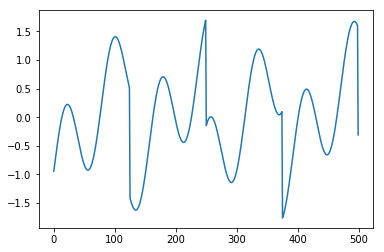

In [317]:
med1=sample1_data.std(axis=0)
s1data= sample1_data/med1
med2=sample2_data.std(axis=0)
s2data=sample2_data/med2

orig=np.matrix([s1data,s2data])
n=len(orig)
A=np.random.random([n,n])
print("Mixing matrix: \n"+str(A))
X=np.dot(A,orig)
plt.figure(1)
plt.plot(X[0].T)
plt.show()
plt.figure(2)
plt.plot(X[1].T)
plt.show()

In [318]:
Audio(data=X[0], rate=16000)

In [319]:
Audio(data=X[1], rate=16000)

In [320]:
eta=0.01
eta0=eta
T=1000
num_iter=20000

W=np.random.random([n,n])/100
print("Initial guessed decomposition matrix: \n"+str(W))
for i in range(0,num_iter):
    Y=np.dot(W,X)
    delW=gradient(eta,Y,W)
    W+=delW
    eta=eta0/(1+(i/T))
    
eta=0.01
eta0=eta
T=1000

W=np.random.random([n,n])/100
print("Initial guessed decomposition matrix: \n"+str(W))
for i in range(0,num_iter):
    Y=np.dot(W,X)
    delW=gradient(eta,Y,W)
    W+=delW
    eta=eta0/(1+(i/T))

Initial guessed decomposition matrix: 
[[ 0.00423655  0.00645894]
 [ 0.00437587  0.00891773]]
Initial guessed decomposition matrix: 
[[ 0.00963663  0.00383442]
 [ 0.00791725  0.00528895]]


[[ 0.3050013  -0.28434379]
 [-0.24636128  0.32887965]]


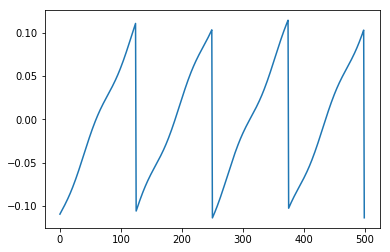

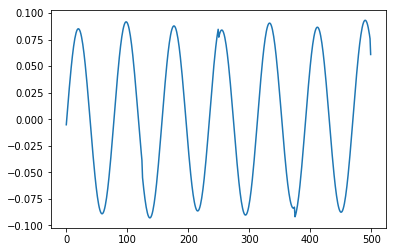

In [321]:
print(W)
Y2=np.dot(W,X)
plt.figure(1)
plt.plot(Y2[0].T)
plt.show()
plt.figure(2)
plt.plot(Y2[1].T)
plt.show()

In [322]:
Audio(data=Y2[0], rate=16000)

In [323]:
Audio(data=Y2[1], rate=16000)

In [324]:
Audio(data=sample1_data, rate=16000)

In [325]:
Audio(data=sample2_data, rate=16000)